In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import sklearn.metrics as skm

In [ ]:
#Loading and reading the dataset
data = pd.read_csv('extended_salary_data.csv')
display(data)
#Calculating basic statistics for the dataframe
display(data.describe())
#Calculating the basic statistics for each column
print("Average Salary:",data['Salary'].mean(),'\n',"Median Salary:",data['Salary'].median(),'\n',"Variance in Salary:",data['Salary'].var())
print("Average Years of Experience:",data['YearsExperience'].mean(),'\n',"Median Years of Experience:",data['YearsExperience'].median(),'\n',"Variance in Years of Experience:",data['YearsExperience'].var())

,YearsExperience,Salary
0,8.1,77884.67
1,19.1,127213.68
2,14.9,103343.52
3,12.4,88988.96
4,4.0,35214.78
5,4.0,42801.56
6,2.1,35893.61
7,17.5,128071.22
8,12.4,95436.18
9,14.5,84869.60


,YearsExperience,Salary
count,50.000000,50.00000
mean,9.480000,77370.54740
std,5.485491,28298.92442
min,1.400000,33048.80000
25%,4.500000,53861.88000
50%,9.300000,78598.65000
75%,13.350000,95356.22500
max,19.400000,140646.44000


Average Salary: 77370.5474 
 Median Salary: 78598.65 
 Variance in Salary: 800829123.3381461
Average Years of Experience: 9.48 
 Median Years of Experience: 9.3 
 Variance in Years of Experience: 30.09061224489795


In [ ]:
#Assigning 80% of the data for training the model
training = data.iloc[0:40,:]
#Assigning 20% of the data for testing the model
testing = data.iloc[40:,:]
print("Training Data:")
display(training)
print("Testing Data:")
display(testing)

Training Data:


,YearsExperience,Salary
0,8.1,77884.67
1,19.1,127213.68
2,14.9,103343.52
3,12.4,88988.96
4,4.0,35214.78
5,4.0,42801.56
6,2.1,35893.61
7,17.5,128071.22
8,12.4,95436.18
9,14.5,84869.60


Testing Data:


,YearsExperience,Salary
40,3.3,44303.28
41,10.4,85571.13
42,1.7,53278.94
43,18.3,116317.30
44,5.9,51415.06
45,13.6,92982.43
46,6.9,73654.02
47,10.9,87787.51
48,11.4,81702.40
49,4.5,57632.67


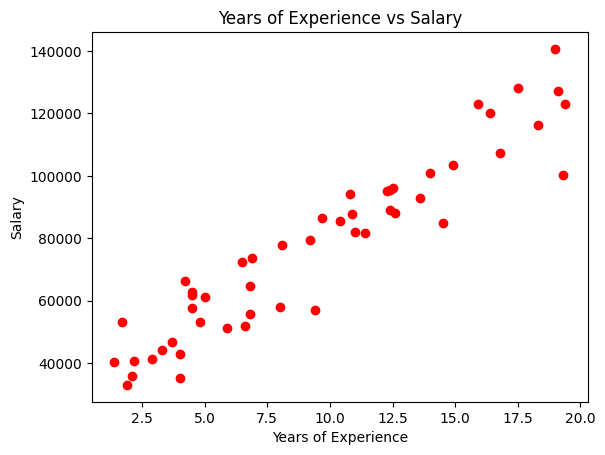

In [ ]:
x = training.iloc[:,0] #Input variable years of experience
y = training.iloc[:,1] #Output variable which is salary
X = testing.iloc[:,0] #Input variables for testing cases
Y = testing.iloc[:,1]  #Output variables for testing cases
#Visualising the data using a scatter plot of the original data
plt.plot(data.iloc[:,0],data.iloc[:,1],'ro')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary')
plt.show()

In [ ]:
import sklearn.linear_model as lm
#Training a linear regression model using Scikitlearn on the training set
model = lm.LinearRegression()
model.fit(x.values.reshape(-1,1),y)
#Obtaining coefficients and intercepts of the linear model
coefficient = model.coef_
intercept = model.intercept_
print(coefficient,intercept)

[5013.77208756] 29576.286372603165


In [ ]:
#Predicting the values of the testing set using the linear regression model
predictions = model.predict(X.values.reshape(-1,1))
print(predictions)
#Calculating mean squared error
print(mean_squared_error(predictions, Y))
#Calculate mean absolute error
print(mean_absolute_error(predictions, Y))

[ 46121.73426156  81719.51608326  38099.69892146 121328.31557502
  59157.54168923  97763.58676347  64171.31377679  84226.40212705
  86733.28817083  52138.26076664]
51456840.03928404
6195.307478490135


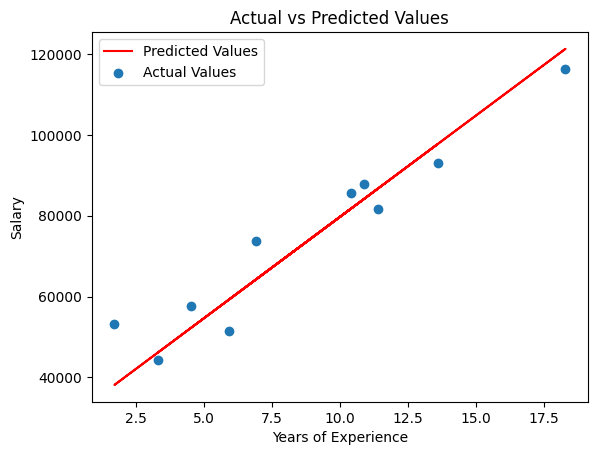

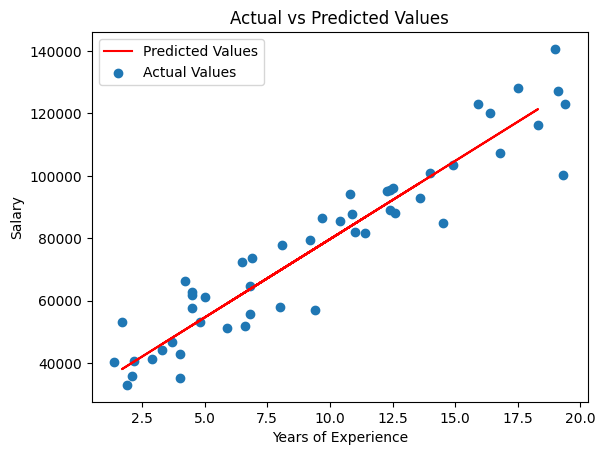

In [129]:
#Plotting the Regression line over the scatter plot of the testing data
plt.plot(np.squeeze(X),predictions, color='red', label = 'Predicted Values')
plt.scatter(np.squeeze(X),np.squeeze(Y), label = 'Actual Values')
plt.title('Actual vs Predicted Values')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()
#Plotting the regression line over the scatter plot of the overall data
plt.plot(np.squeeze(X),predictions, color='red', label = 'Predicted Values')
plt.scatter(np.squeeze(data.iloc[:,0]),np.squeeze(data.iloc[:,1]), label = 'Actual Values')
plt.title('Actual vs Predicted Values')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

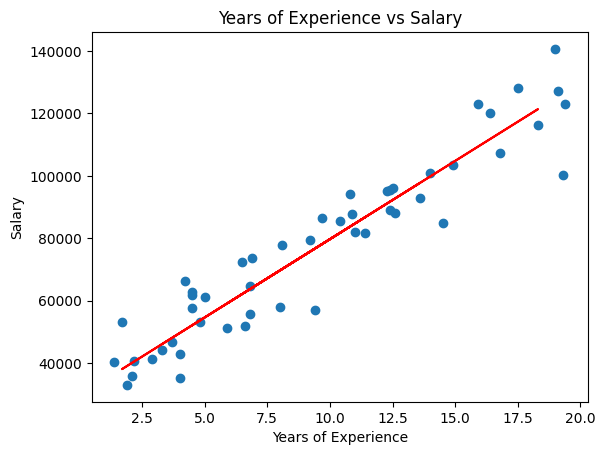

In [ ]:
plt.plot(np.squeeze(X),predictions, color = 'red')
plt.scatter(data.iloc[:,0],data.iloc[:,1])
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

BONUS TASK:

In [ ]:
data['Projects'] = ((4*data['YearsExperience'])/3) #Assuming it takes 9 months to complete a project we are adding a new data column for number of projects completed
display(data)
data['Projects'] = (data['Projects']).astype(int) #Number of projects completed must be an integer
display(data)

,YearsExperience,Salary,Projects
0,8.1,77884.67,10.800000
1,19.1,127213.68,25.466667
2,14.9,103343.52,19.866667
3,12.4,88988.96,16.533333
4,4.0,35214.78,5.333333
5,4.0,42801.56,5.333333
6,2.1,35893.61,2.800000
7,17.5,128071.22,23.333333
8,12.4,95436.18,16.533333
9,14.5,84869.60,19.333333


,YearsExperience,Salary,Projects
0,8.1,77884.67,10
1,19.1,127213.68,25
2,14.9,103343.52,19
3,12.4,88988.96,16
4,4.0,35214.78,5
5,4.0,42801.56,5
6,2.1,35893.61,2
7,17.5,128071.22,23
8,12.4,95436.18,16
9,14.5,84869.60,19


In [ ]:
data_input = data.iloc[:,[0,2]] #Input variables for training the model
data_output = data.iloc[:,1]  #Output variables for training the model
display(X)
display(Y)
training_input = data_input.iloc[0:40,:] #Defining the training input features
training_output = data_output.iloc[0:40] #Defining the training labelled outputs
testing_input = data_input.iloc[40:,:] #Defining the testing input features
testing_output = data_output.iloc[40:] #Defining the testing labelled outputs
display(training_input)
display(training_output)
display(testing_input)
display(testing_output)

,YearsExperience,Projects
0,8.1,10
1,19.1,25
2,14.9,19
3,12.4,16
4,4.0,5
5,4.0,5
6,2.1,2
7,17.5,23
8,12.4,16
9,14.5,19


,Salary
0,77884.67
1,127213.68
2,103343.52
3,88988.96
4,35214.78
5,42801.56
6,35893.61
7,128071.22
8,95436.18
9,84869.60


,YearsExperience,Projects
0,8.1,10
1,19.1,25
2,14.9,19
3,12.4,16
4,4.0,5
5,4.0,5
6,2.1,2
7,17.5,23
8,12.4,16
9,14.5,19


,Salary
0,77884.67
1,127213.68
2,103343.52
3,88988.96
4,35214.78
5,42801.56
6,35893.61
7,128071.22
8,95436.18
9,84869.60


,YearsExperience,Projects
40,3.3,4
41,10.4,13
42,1.7,2
43,18.3,24
44,5.9,7
45,13.6,18
46,6.9,9
47,10.9,14
48,11.4,15
49,4.5,6


,Salary
40,44303.28
41,85571.13
42,53278.94
43,116317.30
44,51415.06
45,92982.43
46,73654.02
47,87787.51
48,81702.40
49,57632.67


In [ ]:
#Training a linear regression model for the above case
bonus_model = lm.LinearRegression()
bonus_model.fit(training_input,training_output)
#Obtaining coefficients and intercepts of the linear model
bonus_coefficient = bonus_model.coef_
bonus_intercept = bonus_model.intercept_
print(bonus_coefficient,bonus_intercept)

[-1318.18155552  4744.55692605] 32258.48971690875


In [ ]:
p = bonus_model.predict(testing_input)
#Calculating mean squared error
print(mean_squared_error(p, testing_output))
#Calculate mean absolute error
print(mean_absolute_error(p, testing_output))

46788829.70565941
6121.408007013171


In [ ]:
# Comparing the multiple regression and simple regression models we have:
print("The multiple regression model has given more accurate predictions with lower MAE and MSE values")
# Calculate MSE for predictions against the correct subset of Y (Y[40:])
mse_simple_regression = mean_squared_error(predictions, Y[40:])
mse_multiple_regression = mean_squared_error(p, testing_output)
print("The difference in MSE values is ", (mse_simple_regression - mse_multiple_regression))

# Calculate MAE for predictions against the correct subset of Y (Y[40:])
mae_simple_regression = mean_absolute_error(predictions, Y[40:])
mae_multiple_regression = mean_absolute_error(p, testing_output)
print("The difference in MAE values is ", (mae_simple_regression - mae_multiple_regression))

The multiple regression model has given more accurate predictions with lower MAE and MSE values
The difference in MSE values is  4668010.333624631
The difference in MAE values is  73.8994714769633
